<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_10_02_MachineLearningGuide(p_146_174).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평가
머신러닝은 데이터 가공/변환, 모델학습/예측, 평가의 프로세스로 구성된다
성능평가지표는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다.
- 회귀의 경우, 예측값의 오차 평균값을, 분류의 경우 정확도(Accuracy), 오차행렬(Confusion matix), 정밀도(Precision), 재현율(Recall), F1스코어, ROC AUC 등을 이용합니다.
- 분류는 결정 클래스 값 종류의 유형에 따라 이진분류와 멀티분류로 나뉠 수 있다.

### 정확도

In [1]:
from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
  # fit 메서드는 아무것도 학습하지 않음
  def fit(self,X, y=None):
    pass
  # predict 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1으로 예측함
  def predict(self,X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X["Sex"].iloc[i]==1:
        pred[i]=0
      else:
        pred[i]=1
    return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 세트로 데이터 분할
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv("/content/drive/MyDrive/ESAA_homework/Titanic/train.csv")
y_df = titanic_df["Survived"]
X_df = titanic_df.drop("Survived", axis=1)
X_df = transform_features(X_df)
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size =0.2, random_state = 0)
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print("Dummy Classifier의 정확도는{0:.4f}".format(accuracy_score(y_test,mypredictions)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dummy Classifier의 정확도는0.7877


MNIST 데이터 셋은 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것이다. 이를 레이블 값이 7인 것만 True, 나머지는 모두 False로 변환한 이진뷴류로 문제를 바꿔 보겠다. 즉 전체 데이터의 10%만 True, 90%는 False인 불균형한 데이터 세트로 변형하는 것이다. 이 데이터셋을 통해 분류하면 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있음을 알 수 있다.

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self,X,y):
    pass

  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고, 이를 astype(int)로 변환. 7번이 아니면 False이고 0으로 변환
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print("레이블 테스트 세트 크기:",y_test.shape)
print("테스트 세트 레이블 0과 1의 분포도")
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf =MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print("모든 예측을 0으로 하여도 정확도는:{:.3f}".format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


### 오차 행렬(Confusion Matrix)
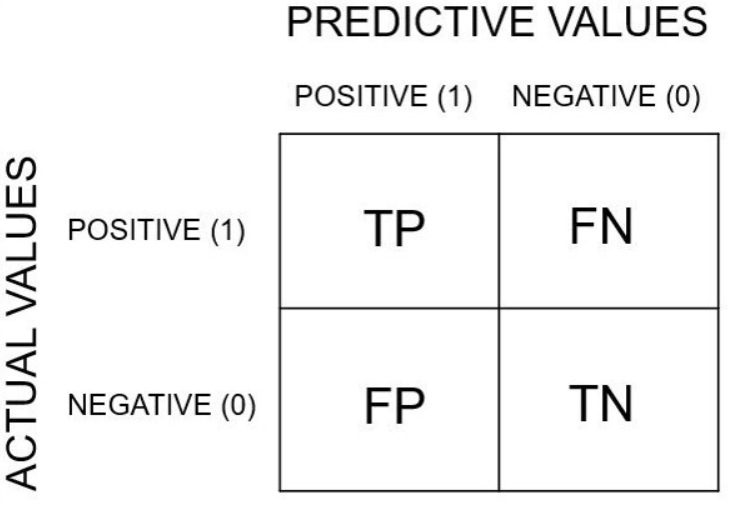

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred) # 모든 예측을 7이 아닌 것으로 판단=> 정확도가 떨어짐을 알 수 있다

array([[405,   0],
       [ 45,   0]])

### 정밀도와 재현율
- 정밀도 = TP/(FP+TP)
- 재현율 = TP/(FN+TP)
- 재현율이 중요 지표인 경우 : 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. Ex) 암환자 양성검사, 보험사기 등
- 정밀도가 중요 지표인 경우 : 실제 Negative인 음성 데이터를 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. Ex) 일반 메일을 스팸메일(Positive)로 분류할 때

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}".format(accuracy, precision, recall))

In [49]:
, LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv("/content/drive/MyDrive/ESAA_homework/Titanic/train.csv")
y_df = titanic_df["Survived"]
X_df = titanic_df.drop("Survived", axis=1)
X_df = transform_features(X_df)
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size =0.2, random_state = 11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 정밀도/재현율 트레이드오프
- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조되어야 할 경유 분류의 결정 임계값(Threshold)를 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 하지만 둘은 상호보완적인 지표이므로 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드-오프(Trade-off)라고 부른다.
- 사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블값으로 예측하게 된다. 일반적인 이진분류에서는 임계값이 0.5, 즉 50%이고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다. 개별 데이터별 예측확률은 predict_proba()메서드를 이용하여 반환할 수 있다.




In [50]:
pred_proba= lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba() 결과 shape:{0}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출 \n:",pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46197474 0.53802526]
 [0.87872398 0.12127602]
 [0.87719492 0.12280508]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197474 0.53802526 1.        ]
 [0.87872398 0.12127602 0.        ]
 [0.87719492 0.12280508 0.        ]]


In [51]:
# 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼값과 두 번째 칼럼 값을 더하면 1이 된다.
# 두 개의 값 중 더 큰 확률값으로 predict()메서드가 최종예측하고 있다.
# predict 메서드는 predict_proba()메서드에 기반해 생성된 API이다.
# predict()는 predict_proba()호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API이다

In [52]:
# Binarizer는 threshold값보다 크면 1, 작으면 0을 반환한다.
from sklearn.preprocessing import Binarizer
X=[[1,-1,2],
   [2,0,0],
   [0,1.1,1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold =1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [53]:
# get_clf_eval을 통해 최종 예측값을 구할 수 있다.
from sklearn.preprocessing import Binarizer

# Binarizer의 threshol값 설정값. 분류 결정 임계값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼. 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1) # 여기에 데이터fit할 때 reshape(-1,1) 형태여야 한다. Binary객체 정의하기
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [54]:
# 분류결정 임계값을 낮춘다 => 재현율이 올라가고 정밀도가 떨어진다
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


In [55]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4,0.45, 0.50,0.55,0.60]
def get_eval_by_threshold(y_test,pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print("임계값:", custom_threshold)
    get_clf_eval(y_test, custom_predict)
    print()

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361

임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033

임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869

임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541

임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377



In [56]:
# precision_recall_curve를 통해 임계값 정밀도와 재현율을 구해 보겠다.
# precision_recall_curve()의 인자로 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률 값을 입력한다.
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1] # predic_proba()의 2번째 column

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15)
print("샘플 추출을 위한 임계값 배열의 index 10개:", thr_index)
print("샘플용 10개의 임계값:", np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print("샘플 임계값별 정밀도:", np.round(precisions[thr_index],3))
print("샘플 임계값별 재현율:", np.round(recalls[thr_index],3))


반환된 분류 결정 임계값 배열의 shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


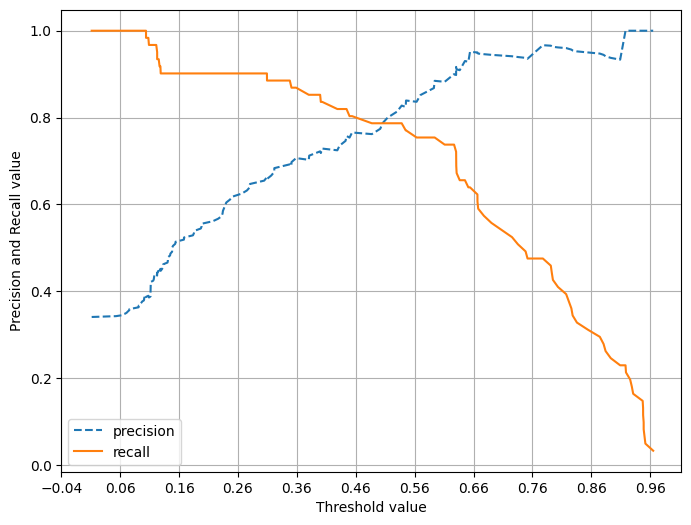

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision")
  plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

  # threshold의 값을 0.1 단위로 변경
  start,end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end,0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel("Threshold value");plt.ylabel("Precision and Recall value")
  plt.legend(); plt.grid()
  plt.show()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### 정밀도와 재현율의 맹점
Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됩니다. 임곗값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용되어야 합니다.

# F1 스코어
F1 스코어는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다
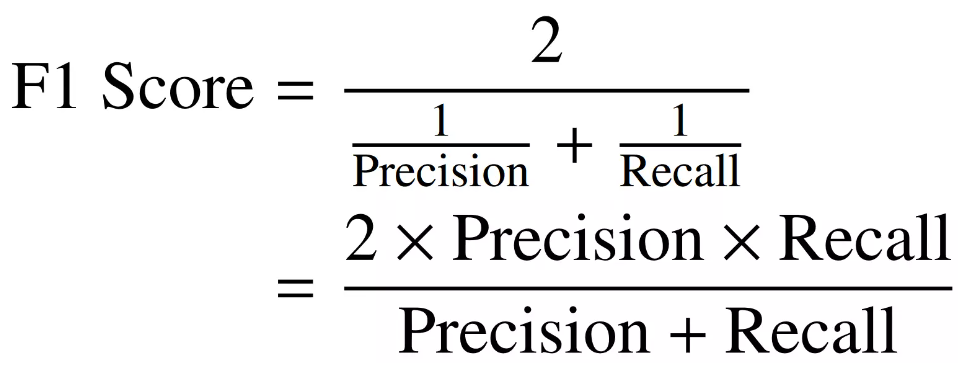

In [58]:
from sklearn.metrics import f1_score
f1 =f1_score(y_test, pred)
print("F1 스코어:{0:.4f}".format(f1))

F1 스코어:0.7805


In [60]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  # F1 스코어 추가
  f1 = f1_score(y_test,pred)
  print("오차행렬\n",confusion)
  # f1 score print 추가
  print("정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}\n".format(accuracy,precision,recall,f1))

thresholds = [0.4,0.45, 0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
 [[98 20]
 [10 51]]
정확도:0.8324, 정밀도:0.7183, 재현율:0.8361, F1:0.7727


임계값: 0.45
오차행렬
 [[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, F1:0.7840


임계값: 0.5
오차행렬
 [[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805


임계값: 0.55
오차행렬
 [[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, F1:0.7931


임계값: 0.6
오차행렬
 [[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, F1:0.8036




### ROC 곡선과 AUC
- ROC 곡선과 이에 기반한 AUC스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC곡선은 이진 분류 모델의 예측 성능을 판단하는 중요 평가 지표이다. ROC곡선은 False Positive Rate가 변할 때 True Positive Rate가 어떻게 변하는지를 나타내는 곡선이다.
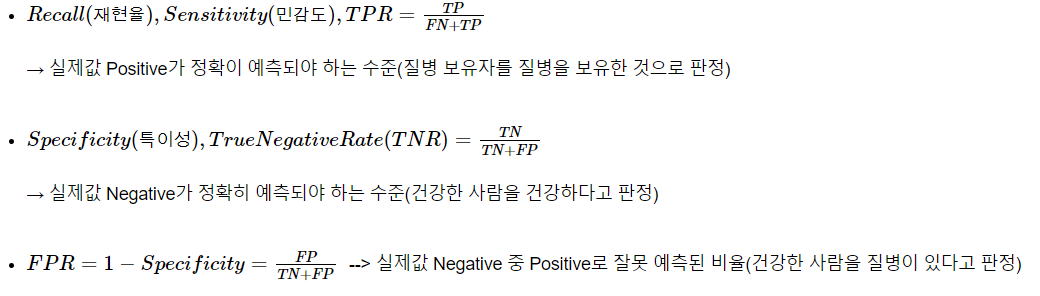
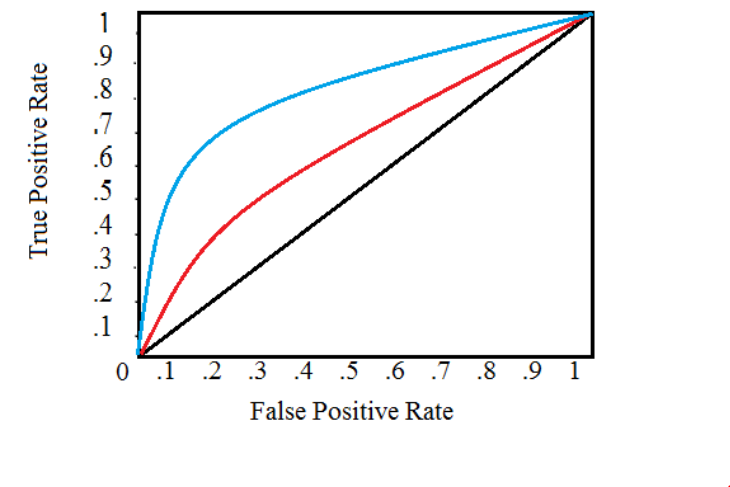
- 위의 그림은 ROC 곡선의 예시이며 가운데 직선은 ROC 곡선의 최저 값이다

- 가운데 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류 ROC 직선이다
- 곡선이 가운데 직선에 가까울 수록 성능이 떨어지는 것이며 멀어질수록 성능이 뛰어나다
- ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한 값을 그래프에 나타낸 것이다

- 분류결정 임계값을 변경함으로써 FPR을 변화시킨다
- '임계값=1'이면 Negative 값을 Positive로 예측하지 않고 FPR이 0이된다. 반대로 임계값을 낮출수록 FPR이 올라간다

In [61]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1 로 임의설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0],5)
print("샘플 추출을 위한 임겟값 배열의 index 10개:", thr_index)
print("샘플용 10개의 임곗값:",np.round(thresholds[thr_index],2))
print("샘플 임곗값별 FPR:", np.round(fprs[thr_index],3))
print("샘플 임곗값별 TPR:", np.round(tprs[thr_index],3))

샘플 추출을 위한 임겟값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


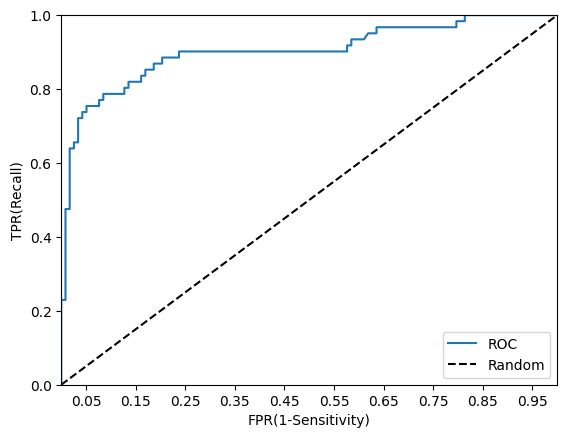

In [62]:
# ROC 곡선 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')

    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

- AUC는 ROC 곡선 밑의 면적을 구한 것으로 1에 가까울수록 좋은 수치이다.
- 보통의 분류는 0.5 이상의 AUC값을 가진다. (직선과 일치하는 경우는 0.5)

In [119]:
# 예전에 titanic 사망자 예측분석했던 결과를 분석한다
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
t_df = pd.read_csv("/content/drive/MyDrive/ESAA_homework/Titanic/train.csv")
y = t_df["Survived"]
X = t_df.drop(["Survived","Name","Ticket"], axis=1)
X['Cabin']=X['Cabin'].str[:1]
X=pd.get_dummies(X, columns=["Sex","Cabin","Embarked"], prefix=["Sex","Cabin", "Embarked"])
X["Age"][X.Age.isnull()]=X.Age.mean()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =0)
model = LogisticRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(confusion_matrix(y_test, preds))

# 정확도, 정밀도, 재현율 구하기
print("정확도: ", np.round(accuracy_score(y_test, preds),4))
print("정밀도: ", np.round(precision_score(y_test, preds),4))
print("재현율: ", np.round(recall_score(y_test, preds),4))

[[95 15]
 [20 49]]
정확도:  0.8045
정밀도:  0.7656
재현율:  0.7101


<ipython-input-119-caea5d11c587>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"][X.Age.isnull()]=X.Age.mean()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  # ROC - AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print("오차행렬\n",confusion)
  print("정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}\n, AUC {4:4f}".format(accuracy,precision,recall,f1,roc_auc))
get_clf_eval(y_test, preds, model.predict_proba(X_test)[:,1])

오차행렬
 [[95 15]
 [20 49]]
정확도:0.8045, 정밀도:0.7656, 재현율:0.7101, F1:0.7368
, AUC 0.867325


In [139]:
pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pred_proba[:,1])
roc_auc

0.8673254281949934